In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
dfF= pd.read_csv("CBS_2021-2023_Full .csv")

In [3]:
dfF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.0+ GB


In [4]:
dfF.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


In [5]:
dfF.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

In [6]:
# Fill missing start latitudes with the mean
dfF['start_lat'].fillna(dfF['start_lat'].mean(), inplace=True)
dfF['start_lng'].fillna(dfF['start_lng'].mean(), inplace=True)

# Fill missing end latitudes with the median
dfF['end_lat'].fillna(dfF['end_lat'].median(), inplace=True)
dfF['end_lng'].fillna(dfF['end_lng'].median(), inplace=True)

In [7]:
# dfF['start_station_name'].fillna('Unknown Station', inplace=True)

In [8]:
# dfF['end_station_name'].fillna('Unknown Station', inplace=True)

In [9]:
dfF['start_station_name'].fillna(dfF['start_station_name'].mode()[0], inplace=True)
dfF['start_station_id'].fillna(dfF['start_station_id'].mode()[0], inplace=True)
dfF['end_station_name'].fillna(dfF['end_station_name'].mode()[0], inplace=True)
dfF['end_station_id'].fillna(dfF['end_station_id'].mode()[0], inplace=True)

In [10]:
dfF.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

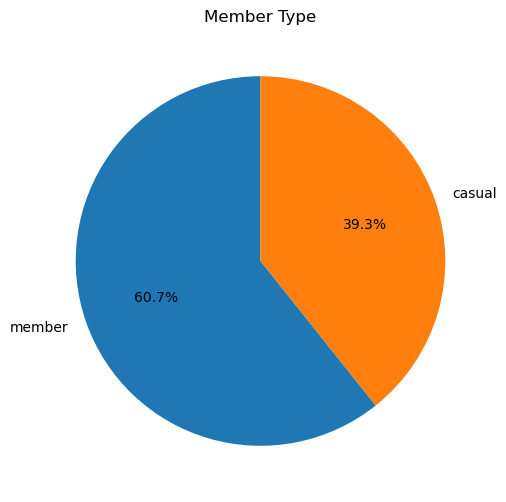

member_casual
member    6492794
casual    4201203
Name: count, dtype: int64


In [11]:
# 1. Ride Frequency
ride_counts = dfF['member_casual'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(ride_counts, labels=ride_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Member Type")
plt.show()
print(ride_counts)

In [12]:
# dfF['started_at'] = pd.to_datetime(dfF['started_at'])
# dfF['ended_at'] = pd.to_datetime(dfF['ended_at'])
# dfF['Month'] = dfF['started_at'].dt.strftime('%B')
# dfF["year"]=dfF["started_at"].dt.year
# dfF["start_hour"]=dfF["started_at"].dt.hour
# dfF["end_hour"]=dfF["ended_at"].dt.hour
# dfF["day"] = dfF["started_at"].dt.day
# dfF["day of week"] = dfF["started_at"].dt.strftime("%A")
# dfF["date_is_weekend"] = np.where(dfF["day of week"].isin([5, 6]),1,0)

In [13]:
# # Remove rows with missing values
# dfF_cleaned = dfF.dropna()
# dfF_cleaned.head(3)

In [14]:
# dfF_cleaned.isnull().sum()

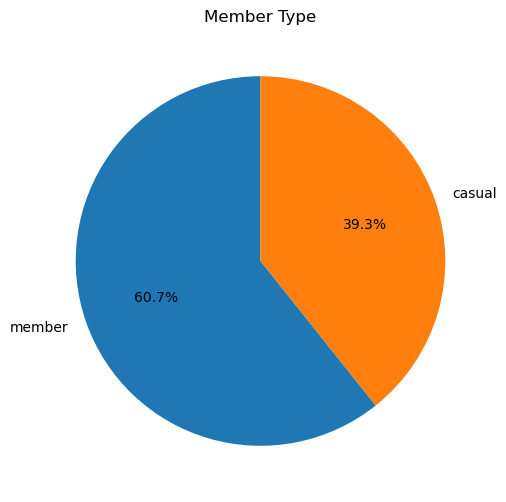

member_casual
member    6492794
casual    4201203
Name: count, dtype: int64


In [15]:
# 1. Ride Frequency
ride_counts = dfF['member_casual'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(ride_counts, labels=ride_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Member Type")
plt.show()
print(ride_counts)

In [16]:
# dfF['started_at'] = pd.to_datetime(dfF['started_at'], dayfirst=True)
# dfF['ended_at'] = pd.to_datetime(dfF['ended_at'], dayfirst=True)

dfF['started_at'] = pd.to_datetime(dfF['started_at'], format='%Y-%m-%d %H:%M:%S')
dfF['ended_at'] = pd.to_datetime(dfF['ended_at'], format='%Y-%m-%d %H:%M:%S')

In [17]:
dfF['Month'] = dfF['started_at'].dt.strftime('%B')
dfF["year"]=dfF["started_at"].dt.year
dfF["start_hour"]=dfF["started_at"].dt.hour
dfF["end_hour"]=dfF["ended_at"].dt.hour
dfF["day"] = dfF["started_at"].dt.day
dfF["day of week"] = dfF["started_at"].dt.strftime("%A")
dfF["date_is_weekend"] = np.where(dfF["day of week"].isin([5, 6]),1,0)

In [18]:
dfF.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Month', 'year', 'start_hour', 'end_hour', 'day',
       'day of week', 'date_is_weekend'],
      dtype='object')

In [19]:
# Calculate trip duration in seconds
dfF['trip_duration'] = (dfF['ended_at'] - dfF['started_at']).dt.total_seconds()

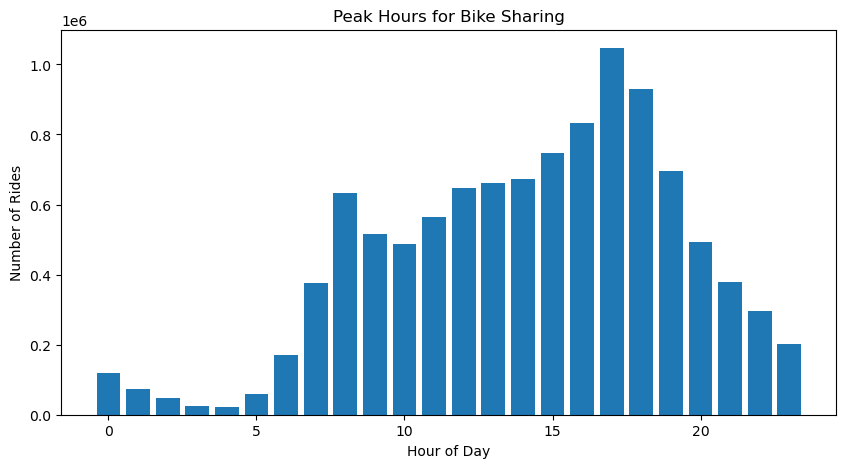

In [20]:
# Peak hours
dfF['start_hour'] = dfF['started_at'].dt.hour
peak_hours = dfF['start_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(peak_hours.index, peak_hours.values)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Peak Hours for Bike Sharing')
plt.show()


In [21]:
dfF['time_of_day'] = dfF['start_hour'].apply(lambda value: 'Morning' if value in (4,5,6,7,8,9,10,11)
                                                        else 'Afternoon' if value in (12,13,14,15,16)
                                                        else 'Evening' if value in (17,18,19,20,21) 
                                                        else 'Night')

dfF['time_of_day'] = pd.Categorical(dfF['time_of_day'],
categories=["Morning","Afternoon","Evening","Night"])

In [22]:
# create trip duration column
dfF["trip_duration_min"] = np.round((dfF["ended_at"] - dfF["started_at"]) / np.timedelta64(1,"m"),0)

In [23]:
print(f"Max trip duration : {dfF["trip_duration_min"].max()}")
print(f"Min trip duration : {dfF["trip_duration_min"].min()}")

Max trip duration : 54540.0
Min trip duration : -5626.0


In [24]:
dfF["rideable_type"].value_counts()

rideable_type
classic_bike     7710372
electric_bike    2444151
docked_bike       539474
Name: count, dtype: int64

In [25]:
# Calculate total rides
total_rides = len(dfF)

# Calculate casual rides
casual_rides = len(dfF[dfF['member_casual'] == 'casual'])

# Calculate casual rider percentage
casual_rider_percentage = (casual_rides / total_rides) * 100

print(f"Casual Rider Percentage: {casual_rider_percentage:.2f}%")

Casual Rider Percentage: 39.29%


In [26]:
# Group by month and calculate casual rider percentage for each month
monthly_casual_ridership = dfF.groupby(['year', 'Month'])['member_casual'].apply(lambda x: (x == 'casual').sum() / len(x) * 100).reset_index(name='casual_percentage')

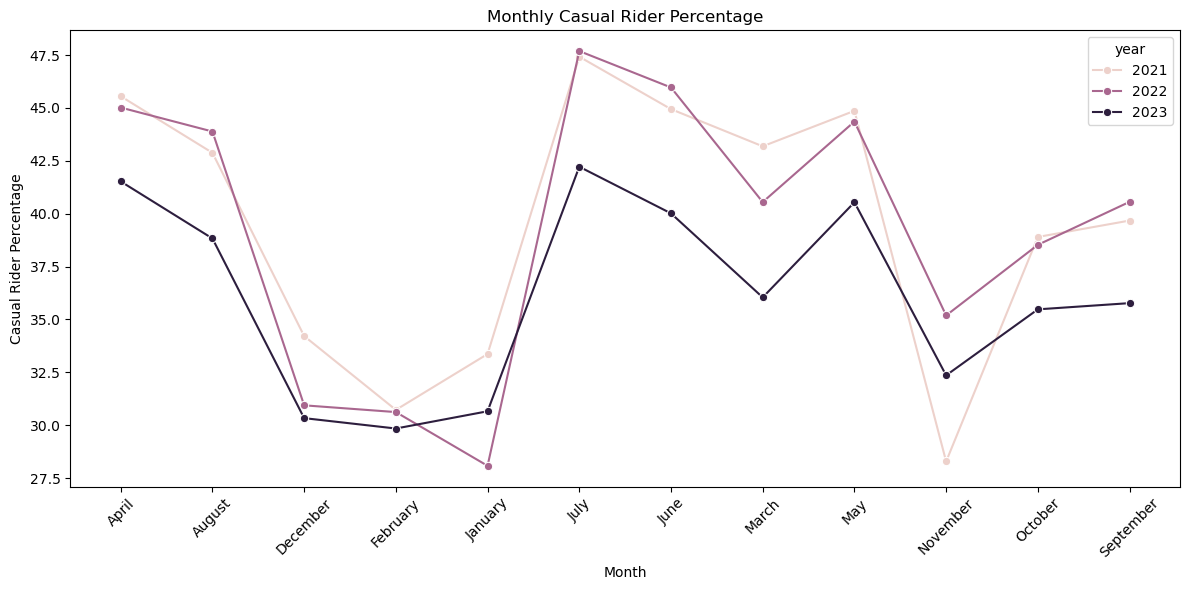

In [27]:
# Plot monthly casual rider percentage
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='casual_percentage', hue='year', data=monthly_casual_ridership, marker='o', color= '.3')
plt.title('Monthly Casual Rider Percentage')
plt.xlabel('Month')
plt.ylabel('Casual Rider Percentage')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

In [28]:
dfF["year"].value_counts()

year
2023    4467334
2022    3476782
2021    2749881
Name: count, dtype: int64

In [29]:
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8),  sharey=True)
# fig.suptitle('Count of Bikes During Different Years')

# for i, year in enumerate(dfF['year'].unique()):
#     year_data = dfF[dfF['year'] == year]
#     sns.barplot(data=year_data, x='member_casual', ax=axes[i])
#     axes[i].set_title(f'year: {year}')

In [30]:
# popular_routes = dfF.groupby(['start_station_name', 'end_station_name']).size().nlargest(10)

# # Extract labels from the MultiIndex
# labels = popular_routes.index.get_level_values('start_station_name') + '-' + popular_routes.index.get_level_values('end_station_name')

# plt.figure(figsize=(8,7),)
# plt.bar(labels, popular_routes.values)  # Use labels as x-axis labels
# plt.xlabel('Start Station - End Station')
# plt.xticks(rotation=45, ha='right')
# plt.ylabel('Number of Rides')

In [31]:
dfF.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,Month,year,start_hour,end_hour,day,day of week,date_is_weekend,trip_duration,time_of_day,trip_duration_min
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,January,2021,0,0,1,Friday,0,1520.0,Night,25.0
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,Columbus Circle / Union Station,31623.0,38.917193,-77.025894,...,January,2021,0,0,1,Friday,0,951.0,Night,16.0
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,January,2021,0,0,1,Friday,0,853.0,Night,14.0
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,January,2021,0,0,1,Friday,0,335.0,Night,6.0
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,January,2021,0,0,1,Friday,0,194.0,Night,3.0


In [32]:
# plt.figure(figsize=(10, 6))

# # Calculate mean 'total_count' for each year and member and casual
# sns.lineplot(x='year', y='trip_duration', data=dfF, hue='member_casual', err_style="bars")

# # Add title and labels
# plt.title('Hourly distribution of bike rentals')
# plt.xlabel('Hour')
# plt.ylabel('total_Rides')

# # Show the plot
# plt.show()

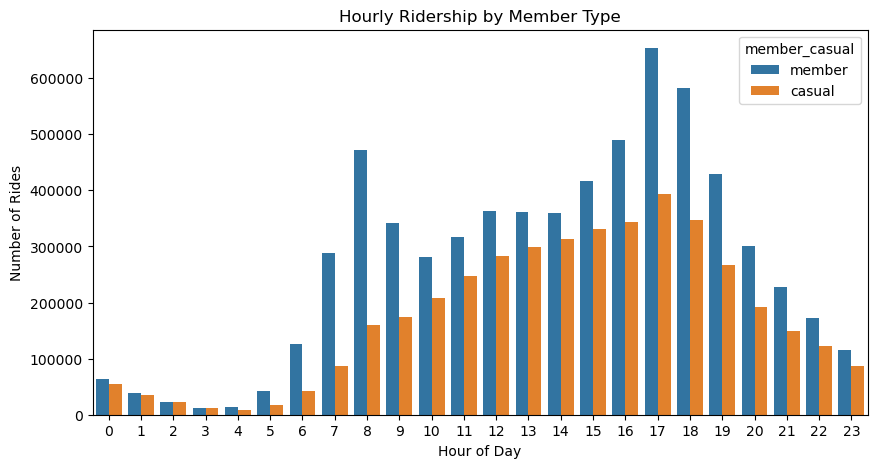

In [33]:
# Hourly ridership comparison
plt.figure(figsize=(10, 5))
sns.countplot(x='start_hour', hue='member_casual', data=dfF)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.title('Hourly Ridership by Member Type')
plt.show()


In [34]:
# import pandas as pd

# # Assuming you have a column indicating the year (e.g., 'Year')
# dfF_2021 = dfF[dfF['year'] == 2021]
# dfF_2022 = dfF[dfF['year'] == 2022]
# dfF_2023 = dfF[dfF['year'] == 2023]

# # Save each dataset to a separate CSV file
# dfF_2021.to_csv('dfF_2021.csv', index=False)
# dfF_2022.to_csv('dfF_2022.csv', index=False)
# dfF_2023.to_csv('dfF_2023.csv', index=False)

In [35]:
dfF.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,Month,year,start_hour,end_hour,day,day of week,date_is_weekend,trip_duration,time_of_day,trip_duration_min
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,January,2021,0,0,1,Friday,0,1520.0,Night,25.0
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,Columbus Circle / Union Station,31623.0,38.917193,-77.025894,...,January,2021,0,0,1,Friday,0,951.0,Night,16.0
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,January,2021,0,0,1,Friday,0,853.0,Night,14.0
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,January,2021,0,0,1,Friday,0,335.0,Night,6.0
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,January,2021,0,0,1,Friday,0,194.0,Night,3.0


In [36]:
dfF['month_year'] = dfF['Month'] + ' ' + dfF['year'].astype(str)

In [64]:
member_start = dfF[dfF['member_casual'] == 'member']['start_station_name'].value_counts().head(10)
casual_start = dfF[dfF['member_casual'] == 'casual']['start_station_name'].value_counts().head(10)
member_destination = dfF[dfF['member_casual'] == 'member']['end_station_name'].value_counts().head(10)
casual_destination = dfF[dfF['member_casual'] == 'casual']['end_station_name'].value_counts().head(10)

In [ ]:
# plt.bar(member_start.index,member_start, color = "#75b2ce" )
# plt.xticks(rotation = 45, ha = 'right')
# plt.title("The top 10 start stations of 'member' riders", fontweight="bold")
# # labels for the x and y axes
# plt.xlabel('Start station')
# plt.ylabel ('Number of riders')
# plt.show()

# print ("The top 10 start stations of 'member' riders")
# member_start

In [ ]:
# #The top 10 start station of 'casual' riders"
# plt.bar(casual_start.index,casual_start, color = "#75b2ce")
# plt.xticks(rotation = 45, ha = 'right')
# plt.title("The top 10 start stations of 'casual' riders", fontweight="bold")
# # labels for the x and y axes
# plt.xlabel('Start station')
# plt.ylabel ('Number of casual riders')
# plt.show()
# print("The top 10 start stations of 'casual' riders")
# casual_start

In [ ]:
# #The top 10 destination stations of member riders
# plt.bar(member_destination.index, member_destination, color = "#e7f56a")
# plt.xticks(rotation = 45, ha = 'right')
# plt.title("The top 10 destination stations of member riders", fontweight="bold")
# # labels for the x and y axes
# plt.xlabel('Destination station')
# plt.ylabel ('Number of member riders')
# plt.show()
# print("The top 10 destination stations of member riders")
# member_destination

In [ ]:
# #The top 10 destination station of 'casual' riders
# plt.bar(casual_destination.index,casual_destination, color = "#75b2ce")
# plt.xticks(rotation = 45, ha = 'right')
# plt.title("The top 10 destination stations of 'casual' riders", fontweight="bold")
# # labels for the x and y axes
# plt.xlabel('Destination station')
# plt.ylabel ('Number of member riders')
# plt.show()

# print ("The top 10 destination stations for 'casual' riders")
# casual_destination

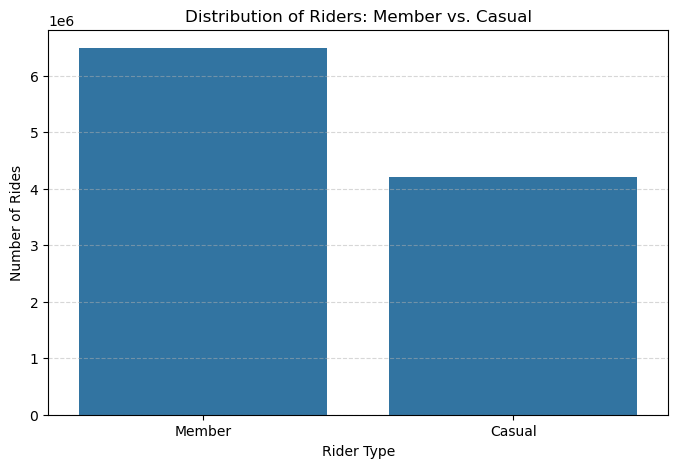

In [42]:
plt.figure(figsize=(8, 5)) 

# Create the countplot
sns.countplot(x='member_casual', data=dfF)

# Set title and labels
plt.title('Distribution of Riders: Member vs. Casual')
plt.xlabel('Rider Type')
plt.ylabel('Number of Rides')

# Customize appearance (optional)
plt.xticks(ticks=[0, 1], labels=['Member','Casual']) 
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [43]:
# plt.figure(figsize=(6, 5))
# sns.histplot(dfF_cleaned['member_casual'], shrink=0.7)
# plt.xlabel('Member Type')
# plt.ylabel('Trip Duration (seconds)')
# plt.title('Trip Duration by Member Type')
# plt.show()


In [44]:
# Analyze station congestion
station_usage = pd.concat([dfF['start_station_name'], dfF['end_station_name']])
station_counts = station_usage.value_counts()

In [45]:
# Identify stations with high usage
high_usage_stations = station_counts[station_counts > 1000]  # Adjust threshold as needed
print("Stations with High Usage:\n", high_usage_stations)


Stations with High Usage:
 Columbus Circle / Union Station                          1018718
New Hampshire Ave & T St NW                               950812
15th & P St NW                                            196868
Lincoln Memorial                                          193859
Jefferson Dr & 14th St SW                                 181527
                                                          ...   
Piccard & W Gude Dr                                         1033
Virginia Theological Seminary                               1026
S Jordan St & Venable St                                    1025
Briggs Chaney Park & Ride                                   1009
North Shore & Cameron Crescent Dr/Crescent Apartments       1008
Name: count, Length: 707, dtype: int64


In [46]:
high_usage_stations.head(10)

Columbus Circle / Union Station                          1018718
New Hampshire Ave & T St NW                               950812
15th & P St NW                                            196868
Lincoln Memorial                                          193859
Jefferson Dr & 14th St SW                                 181527
1st & M St NE                                             178725
4th St & Madison Dr NW                                    168583
5th & K St NW                                             158221
Smithsonian-National Mall / Jefferson Dr & 12th St SW     157063
Eastern Market Metro / Pennsylvania Ave & 8th St SE       155810
Name: count, dtype: int64

In [72]:
# Define a function to determine the season based on the month
def get_season(month):
    if month in ['December', 'January', 'February']:
      return 'Winter'
    elif month in ['March', 'April', 'May']:
      return 'Spring'
    elif month in ['June', 'July', 'August']:
      return 'Summer'
    else:
      return 'Autumn'

# Apply the get_season function to the 'Month' column and create a new 'Season' column
dfF['Season'] = dfF['Month'].apply(get_season)
dfF.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,start_hour,end_hour,day,day of week,date_is_weekend,trip_duration,time_of_day,trip_duration_min,month_year,Season
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,0,0,1,Friday,0,1520.0,Night,25.0,January 2021,Winter
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,Columbus Circle / Union Station,31623.0,38.917193,-77.025894,...,0,0,1,Friday,0,951.0,Night,16.0,January 2021,Winter
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,0,0,1,Friday,0,853.0,Night,14.0,January 2021,Winter
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,0,0,1,Friday,0,335.0,Night,6.0,January 2021,Winter
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,0,0,1,Friday,0,194.0,Night,3.0,January 2021,Winter


In [75]:
# plt.figure(figsize=(15, 8)) 
# sns.scatterplot(data=dfF, x= "month_year", y="trip_duration", hue= "Season")

In [65]:
dfF.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Month', 'year', 'start_hour', 'end_hour', 'day',
       'day of week', 'date_is_weekend', 'trip_duration', 'time_of_day',
       'trip_duration_min', 'month_year'],
      dtype='object')

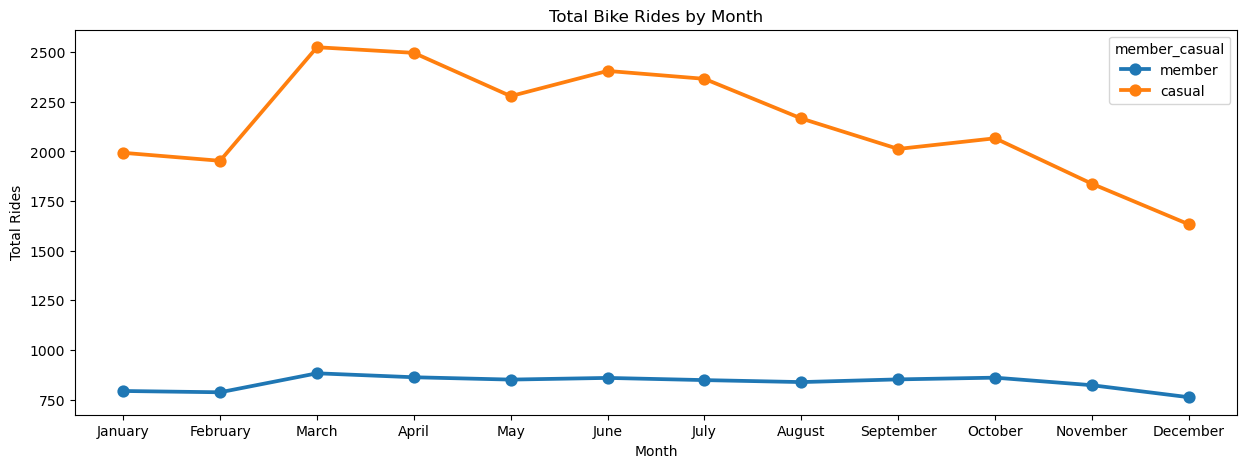

In [68]:
fig, ax = plt.subplots(figsize=(15,5))
sns.pointplot(data=dfF, x='Month', y='trip_duration', hue= 'member_casual', errorbar=None, ax=ax)
ax.set(title='Total Bike Rides by Month')
ax.set_ylabel('Total Rides')
ax.set_xlabel('Month')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

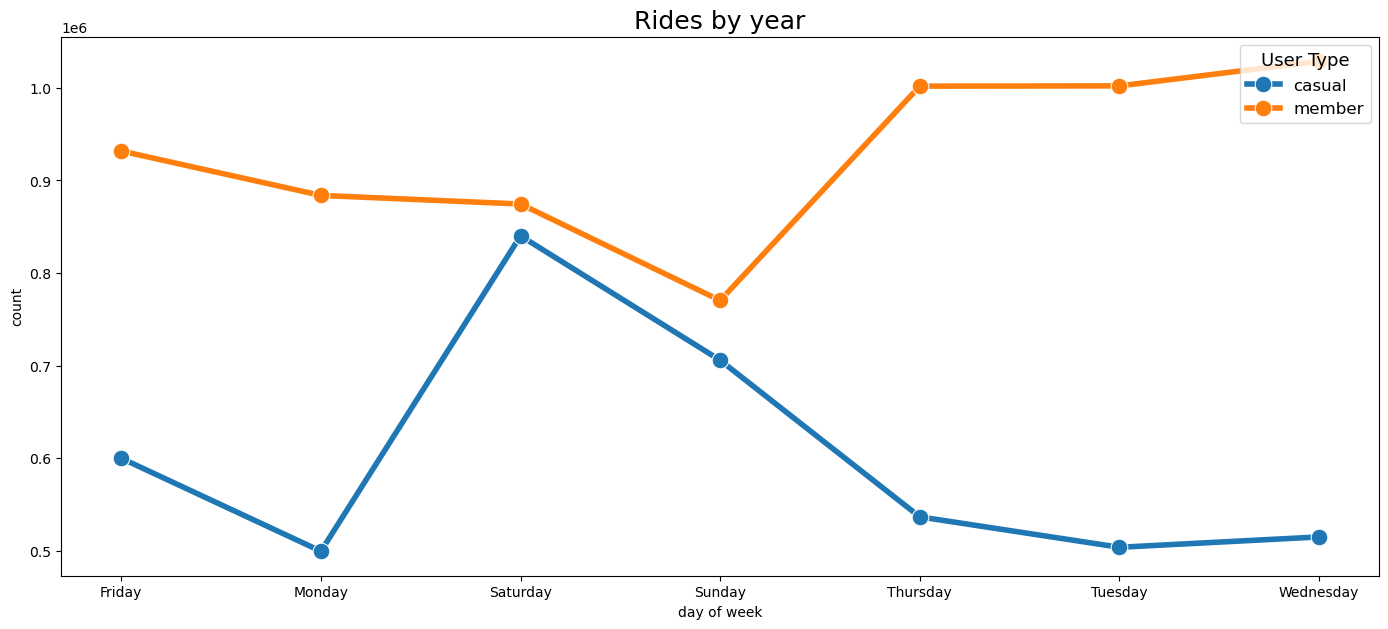

In [48]:
# Aggregate data by month and user type
user_type_counts = dfF.groupby(['day of week', 'member_casual']).size().reset_index(name='count')

# Create the plot
plt.figure(figsize=(17, 7))

# Plot user type rides with hue for 'member1_casual2' and set custom colors
sns.lineplot(data=user_type_counts, x='day of week', y='count', hue='member_casual', linewidth=4, marker='o', markersize=12)

# Set title and legend
plt.title("Rides by year", fontsize=18)
plt.legend(title='User Type', loc='upper right', fontsize=12, title_fontsize='13')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

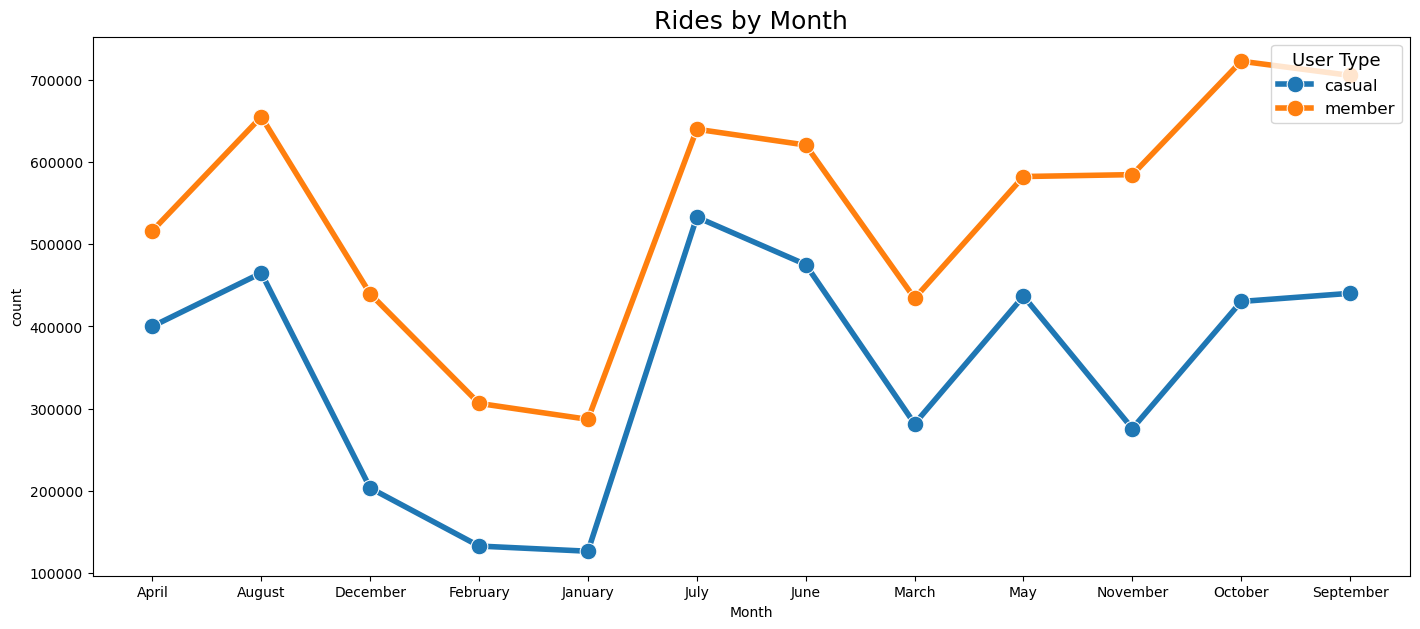

In [49]:
# Aggregate data by month and user type
user_type_counts = dfF.groupby(['Month', 'member_casual']).size().reset_index(name='count')

# Create the plot
plt.figure(figsize=(17, 7))

# Plot user type rides with hue for 'member1_casual2' and set custom colors
sns.lineplot(data=user_type_counts, x='Month', y='count', hue='member_casual', linewidth=4, marker='o', markersize=12)

# Set title and legend
plt.title("Rides by Month", fontsize=18)
plt.legend(title='User Type', loc='upper right', fontsize=12, title_fontsize='13')
plt.show

In [50]:
# # Trip duration vs. distance
# # Assuming you have calculated distance in a separate step
# plt.figure(figsize=(10, 5))
# sns.barplot(x='rideable_type', y='trip_duration', data=dfF)
# plt.xlabel('Distance')
# plt.ylabel('Trip Duration (seconds)')
# plt.title('Trip Duration vs. Distance')
# plt.show()


In [51]:
# fig, ax = plt.subplots(figsize=(8,6))
# sns.barplot(data=dfF_cleaned, x='year', ax=ax)
# ax.set(title='Count of bikes during different years')

In [52]:
# # Yearly Ride Patterns (if available)
# if 'year' in dfF.columns:
#     yearly_rides = dfF.groupby('year')['ride_id'].count()

#     plt.figure(figsize=(10, 6))
#     plt.bar(yearly_rides, yearly_rides.values)
#     plt.xlabel("Year")
#     plt.ylabel("Number of Rides")
#     plt.title("Yearly Ride Patterns")
#     plt.show()

In [53]:
# import pandas as pd

# # Assuming your DataFrame is named 'df' and the column is 'rideable_type'

# # Create separate DataFrames for each rideable_type
# classic_bike = dfF_cleaned[dfF_cleaned['rideable_type'] == 'classic_bike']
# electric_bike = dfF_cleaned[dfF_cleaned['rideable_type'] == 'electric_bike']
# docked_bike = dfF_cleaned[dfF_cleaned['rideable_type'] == 'docked_bike']

# # Print the shapes of the resulting DataFrames (optional)
# # print(f"Classic Bike DataFrame shape: {classic_bike.shape}")
# # print(f"Electric Bike DataFrame shape: {electric_bike.shape}")
# # print(f"Docked Bike DataFrame shape: {docked_bike.shape}")

# # Save each dataset to a separate CSV file
# classic_bike.to_csv('classicbike.csv', index=False)
# electric_bike.to_csv('electricbike.csv', index=False)
# docked_bike.to_csv('dockedbike.csv', index=False)


In [54]:
dfF["rideable_type"].value_counts()

rideable_type
classic_bike     7710372
electric_bike    2444151
docked_bike       539474
Name: count, dtype: int64

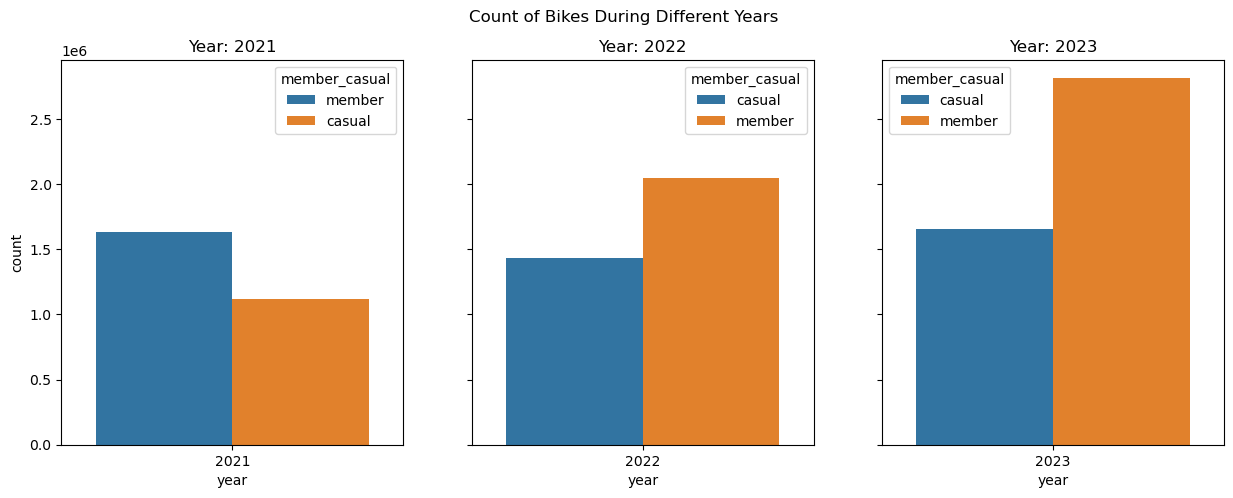

In [55]:
# Create separate subplots for each year
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5),  sharey=True)
fig.suptitle('Count of Bikes During Different Years')

for i, year in enumerate(dfF['year'].unique()):
    year_data = dfF[dfF['year'] == year]
    sns.countplot(data=year_data, x='year', hue='member_casual', ax=axes[i])
    axes[i].set_title(f'Year: {year}')

plt.show()

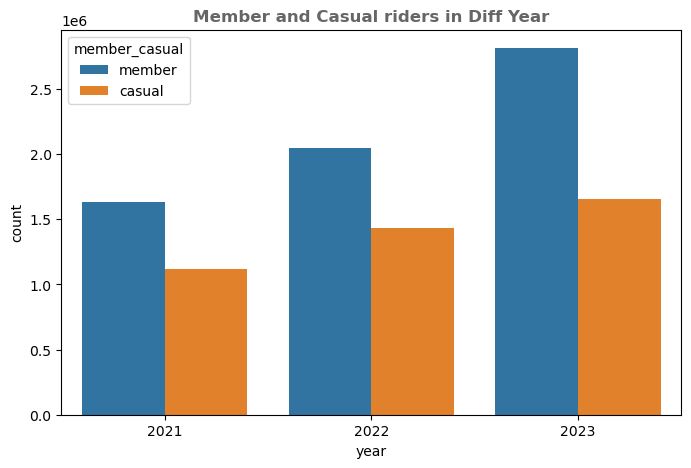

In [56]:
plt.figure(figsize=(8,5))
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), sharey=True)
sns.countplot(x = 'year', hue = 'member_casual', data = dfF)
plt.title('Member and Casual riders in Diff Year', fontweight="bold", alpha=0.6,)
plt.show()

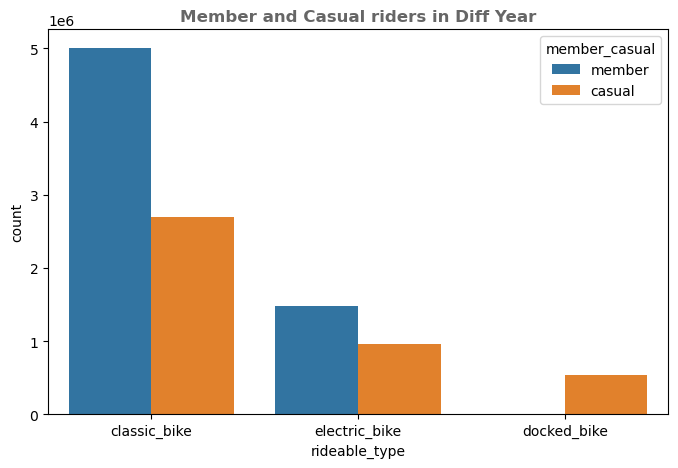

In [57]:
plt.figure(figsize=(8,5))
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), sharey=True)
sns.countplot(x = 'rideable_type', hue = 'member_casual', data = dfF)
plt.title('Member and Casual riders in Diff Year', fontweight="bold", alpha=0.6,)
plt.show()

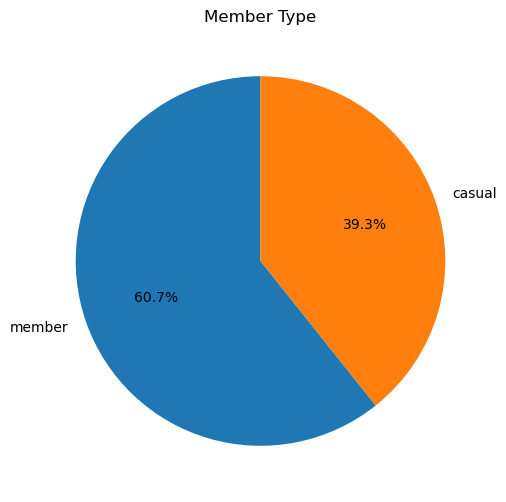

member_casual
member    6492794
casual    4201203
Name: count, dtype: int64


In [58]:
# Ride Frequency
ride_counts = dfF['member_casual'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(ride_counts, labels=ride_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Member Type")
plt.show()
print(ride_counts)

In [59]:
# # Count trips for each start-to-end station pair
# popular_trips = dfF.groupby(["start_station_name", "end_station_name"]).size().reset_index(name="trip_count")

# # Sort by trip count in descending order
# popular_trips = popular_trips.sort_values(by="trip_count", ascending=False)

# # Display the most popular trips
# popular_trips.head(100)

In [60]:
import numpy as np
import folium
from folium import plugins

In [61]:
m=folium.Map()
m

In [62]:
# After that, we can immediately set on creating a map
m=folium.Map()

# By default it will show the world map zoomed out all the way. We can
# remedy that by passing arguments.

m=folium.Map(location=[38.880440 , -77.025236],   # Our map view centrepoint. In our case, Berlin.
                zoom_start=12,              # Starting zoom step
                max_zoom=26,                # Maximum zooming step
                min_zoom=2)   
m

In [76]:
casual_destination.head(10)

end_station_name
Columbus Circle / Union Station                          354528
Lincoln Memorial                                          77495
Jefferson Dr & 14th St SW                                 73292
Henry Bacon Dr & Lincoln Memorial Circle NW               62958
Smithsonian-National Mall / Jefferson Dr & 12th St SW     61408
4th St & Madison Dr NW                                    58583
15th St & Constitution Ave NW                             41619
Jefferson Memorial                                        39090
17th St & Independence Ave SW                             38375
15th St & Pennsylvania Ave NW                             32854
Name: count, dtype: int64

In [62]:
m=folium.Map(location=[ 38.889805, -77.009056 ], zoom_start=12, min_zoom=9)

folium.Marker([38.888255, -77.049437]).add_to(m) # We will add a marker at the specified coordinates 
folium.Marker([38.888553, -77.032427]).add_to(m) 
folium.Marker([38.890539, -77.049383]).add_to(m)  
folium.Marker([38.888774, -77.028694]).add_to(m)  
folium.Marker([38.888097, -77.038325]).add_to(m)  
folium.Marker([38.892244, -77.033234]).add_to(m)  
m

In [63]:
m=folium.Map(location=[ 38.889805, -77.009056 ], zoom_start=12, min_zoom=9)
# We will add a marker at the specified coordinates 
folium.Marker([38.888255, -77.049437], popup ="Lincoln Memorial").add_to(m) 
folium.Marker([38.888553, -77.032427], popup ="Jefferson Dr & 14th St SW ").add_to(m) 
folium.Marker([38.890539, -77.049383], popup ="14th St & New York Ave NW").add_to(m)  
folium.Marker([38.888774, -77.028694], popup= "Smithsonian-National Mall / Jefferson Dr & 12th St SW").add_to(m)  
folium.Marker([38.888097, -77.038325], popup="17th St & Independence Ave SW").add_to(m)  
folium.Marker([38.892244, -77.033234], popup="15th St & Constitution Ave NW").add_to(m)
m


In [ ]:
# Count trips for each start-to-end station pair
popular_trips = dfF.groupby(["start_station_name", "end_station_name"]).size().reset_index(name="trip_count")

# Sort by trip count in descending order
popular_trips = popular_trips.sort_values(by="trip_count", ascending=False)

# Display the most popular trips
popular_trips.head(100)